In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 



In [2]:
pd.set_option('display.max_columns', None) # displays all columns in dfs
warnings.filterwarnings('ignore') # no more 'useless' red warnings 

In [3]:
data = pd.read_csv('marketing_customer_analysis.csv')
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [4]:
data.columns = data.columns.str.lower()
data = data.rename(columns={'employmentstatus':'employment status'})
data.columns

Index(['customer', 'state', 'customer lifetime value', 'response', 'coverage',
       'education', 'effective to date', 'employment status', 'gender',
       'income', 'location code', 'marital status', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies', 'policy type',
       'policy', 'renew offer type', 'sales channel', 'total claim amount',
       'vehicle class', 'vehicle size'],
      dtype='object')

In [5]:
data.shape

(9134, 24)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   state                          9134 non-null   object 
 2   customer lifetime value        9134 non-null   float64
 3   response                       9134 non-null   object 
 4   coverage                       9134 non-null   object 
 5   education                      9134 non-null   object 
 6   effective to date              9134 non-null   object 
 7   employment status              9134 non-null   object 
 8   gender                         9134 non-null   object 
 9   income                         9134 non-null   int64  
 10  location code                  9134 non-null   object 
 11  marital status                 9134 non-null   object 
 12  monthly premium auto           9134 non-null   i

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer lifetime value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly premium auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months since last claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months since policy inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number of open complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number of policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total claim amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [8]:
data['response'].value_counts()


No     7826
Yes    1308
Name: response, dtype: int64

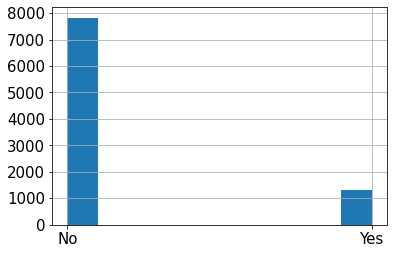

In [9]:
data['response'].hist(xlabelsize = 15, ylabelsize = 15)
plt.show()


In [10]:
data['sales channel'].value_counts()


Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: sales channel, dtype: int64

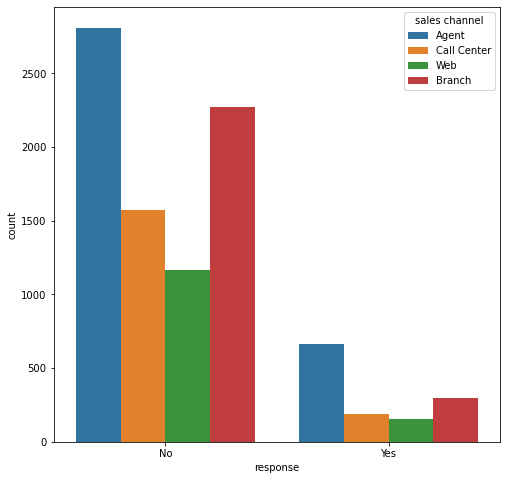

In [11]:
plt.figure(figsize=(8,8))
sns.countplot('response', hue = 'sales channel', data = data)
plt.show()


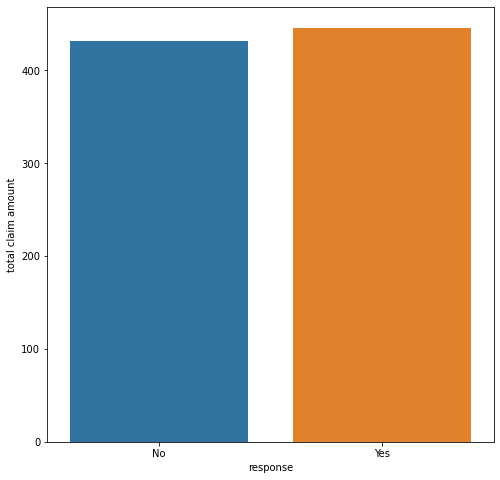

In [12]:
plt.figure(figsize=(8,8))
sns.barplot(x='response', y='total claim amount', data = data, ci = None)
plt.show()


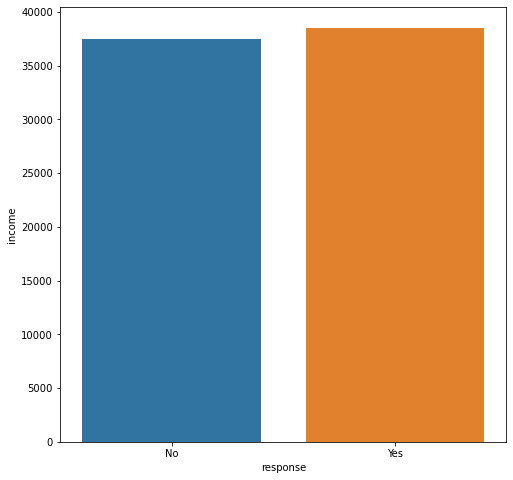

In [13]:
# Show a plot of the response rate by income.

plt.figure(figsize=(8,8))
sns.barplot(x="response", y="income", data=data, ci=None)
plt.show()


In [14]:
list_numerical_types = list(data.select_dtypes(include=['float64','int64']).columns)
list_numerical_types

['customer lifetime value',
 'income',
 'monthly premium auto',
 'months since last claim',
 'months since policy inception',
 'number of open complaints',
 'number of policies',
 'total claim amount']

In [15]:
list_categorical_types = list(data.select_dtypes(include=['object']).columns)
#list(file_1_total.select_dtypes(include=['object']).columns)
list_categorical_types

['customer',
 'state',
 'response',
 'coverage',
 'education',
 'effective to date',
 'employment status',
 'gender',
 'location code',
 'marital status',
 'policy type',
 'policy',
 'renew offer type',
 'sales channel',
 'vehicle class',
 'vehicle size']

In [16]:
numerical = data.copy()
y = numerical['total claim amount'] 
numerical = numerical.drop(['total claim amount', 'customer', 'state', 'response', 'coverage', 'education', 'effective to date', 'employment status', 'gender', 'location code', 'marital status', 'policy type','policy', 'renew offer type', 'sales channel', 'vehicle class', 'vehicle size'], axis = 1) 
X = numerical
numerical.head()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
0,2763.519279,56274,69,32,5,0,1
1,6979.535903,0,94,13,42,0,8
2,12887.431650,48767,108,18,38,0,2
3,7645.861827,0,106,18,65,0,7
4,2813.692575,43836,73,12,44,0,1


In [17]:
numerical.columns

Index(['customer lifetime value', 'income', 'monthly premium auto',
       'months since last claim', 'months since policy inception',
       'number of open complaints', 'number of policies'],
      dtype='object')

In [18]:
categorical = data.copy()
categorical = categorical.drop(['customer','customer lifetime value', 'income', 'monthly premium auto', 'months since last claim', 'months since policy inception', 'number of open complaints', 'number of policies', 'total claim amount'], axis = 1)

In [19]:
categorical.columns
categorical.head()

,state,response,coverage,education,effective to date,employment status,gender,location code,marital status,policy type,policy,renew offer type,sales channel,vehicle class,vehicle size
0,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


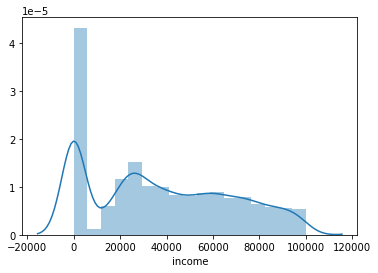

In [20]:
sns.distplot(numerical['income'])
plt.show()
# filtered = numerical[(numerical['income'] < 11000) & (numerical['income'] > 0)]
# filtered['income'].value_counts(dropna = False)

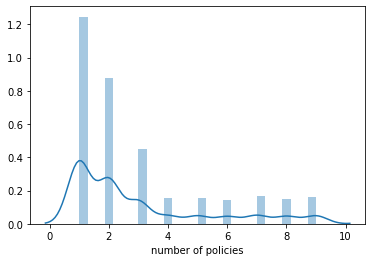

In [21]:
sns.distplot(numerical['number of policies'])
plt.show()

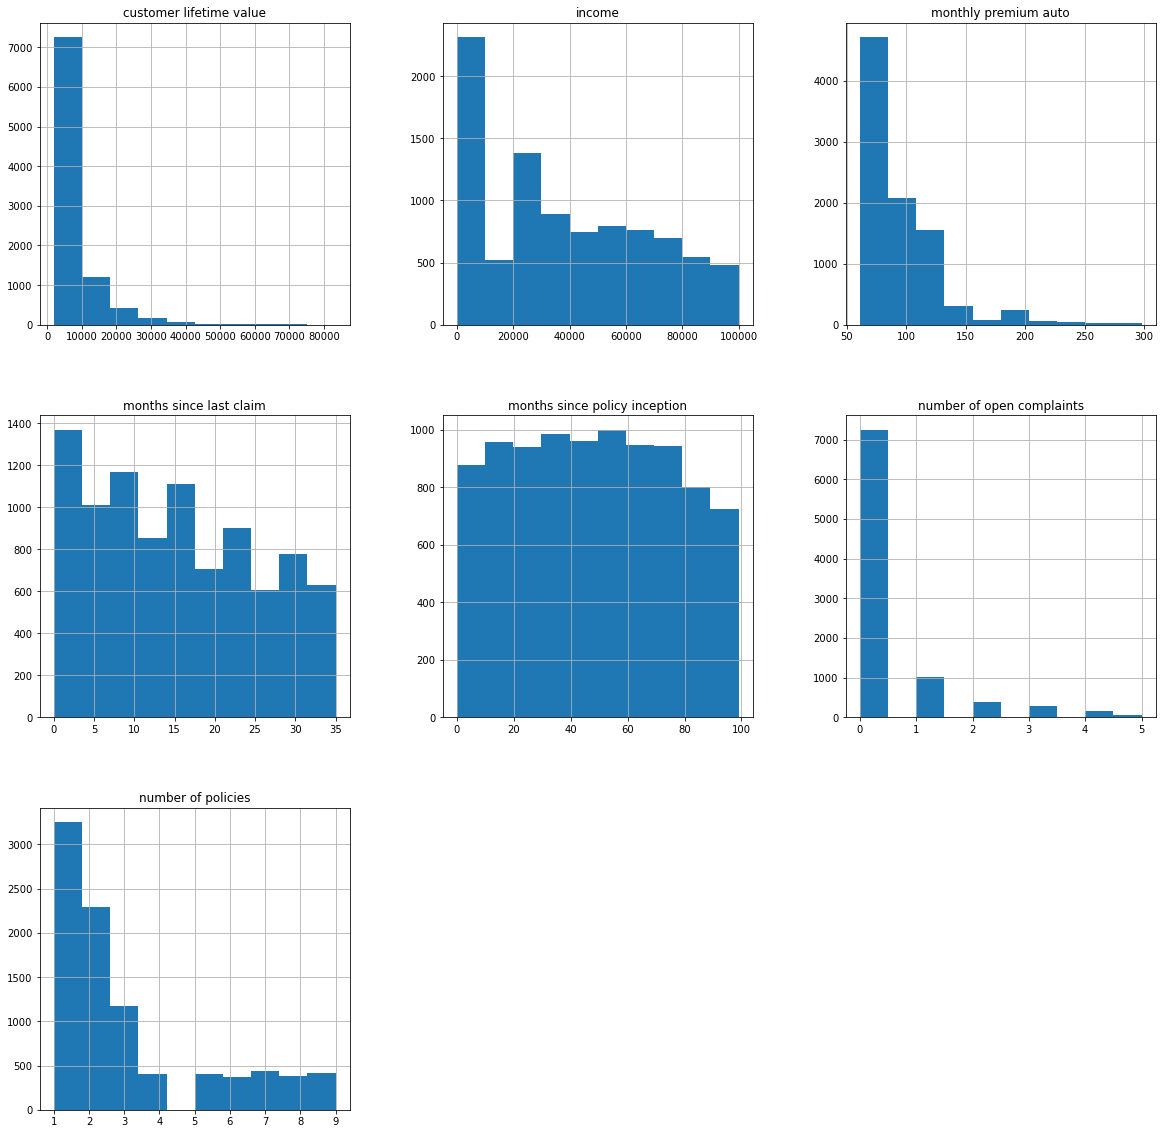

In [22]:
numerical.hist(xlabelsize = 10, ylabelsize = 10, figsize = (20,20))
plt.show()


In [23]:
normal = norm(37657.38000875848, 30379.904733846204) # Initiate normal distribution object 
normal.pdf(0) # The probability of being a zero

6.090892021324578e-06

In [24]:
numerical['income'].mean()


37657.38000875848

In [25]:
numerical['income'].std()

30379.904733846204

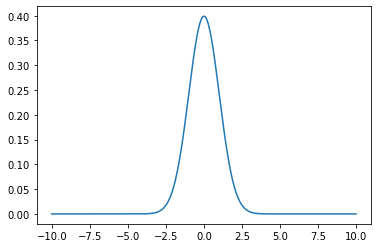

In [26]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(-10,10, 9134) # Generating 1000 evenly spaced numbers between -3 and 3.
y = norm.pdf(x) # Generating a plot of the 'Normal distribution' using the points in x.
ax.plot(x,y)
plt.show()

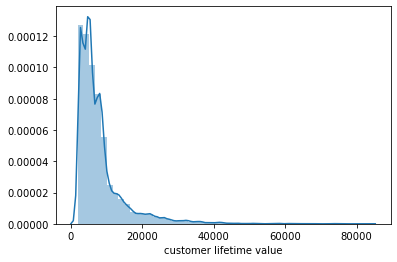

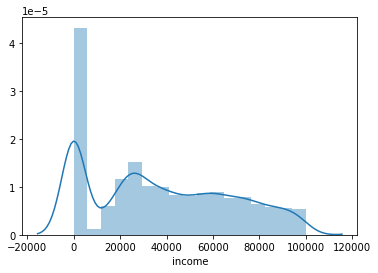

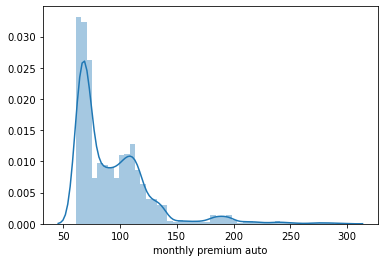

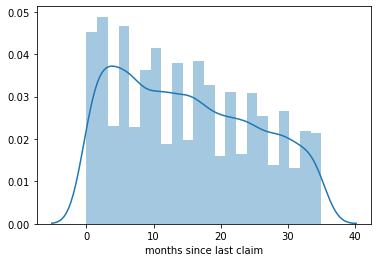

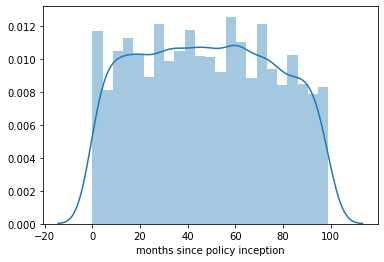

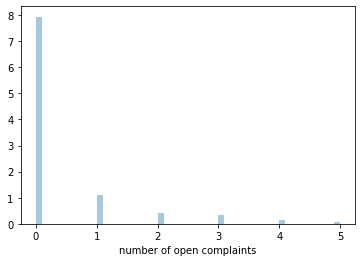

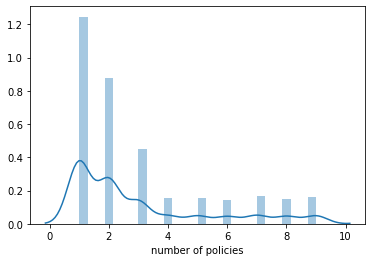

In [27]:
for column in numerical.columns:
    sns.distplot(numerical[column])
    plt.show()

In [28]:
data_corr = numerical.corr()
data_corr

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies
customer lifetime value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656
monthly premium auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233
months since last claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136
months since policy inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333
number of open complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498
number of policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000


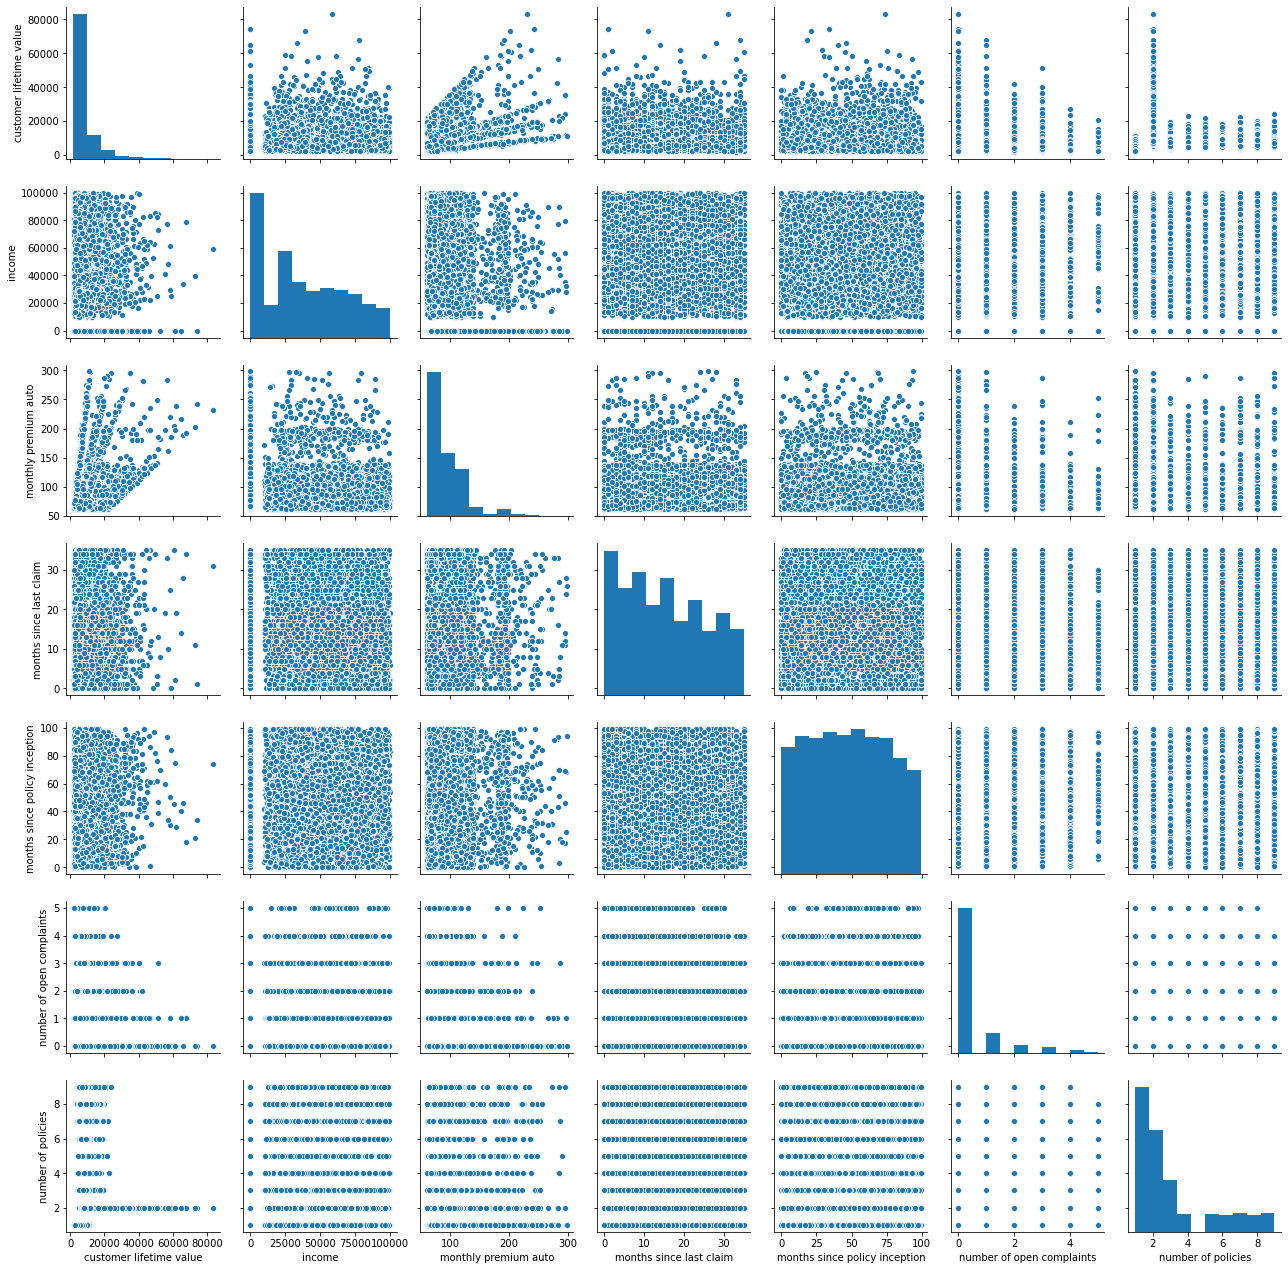

In [29]:
sns.pairplot(numerical)

In [30]:
categorical.columns

Index(['state', 'response', 'coverage', 'education', 'effective to date',
       'employment status', 'gender', 'location code', 'marital status',
       'policy type', 'policy', 'renew offer type', 'sales channel',
       'vehicle class', 'vehicle size'],
      dtype='object')

In [31]:
pd.get_dummies(categorical, drop_first=True)

,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,coverage_Extended,coverage_Premium,education_College,education_Doctor,education_High School or Below,education_Master,effective to date_1/10/11,effective to date_1/11/11,effective to date_1/12/11,effective to date_1/13/11,effective to date_1/14/11,effective to date_1/15/11,effective to date_1/16/11,effective to date_1/17/11,effective to date_1/18/11,effective to date_1/19/11,effective to date_1/2/11,effective to date_1/20/11,effective to date_1/21/11,effective to date_1/22/11,effective to date_1/23/11,effective to date_1/24/11,effective to date_1/25/11,effective to date_1/26/11,effective to date_1/27/11,effective to date_1/28/11,effective to date_1/29/11,effective to date_1/3/11,effective to date_1/30/11,effective to date_1/31/11,effective to date_1/4/11,effective to date_1/5/11,effective to date_1/6/11,effective to date_1/7/11,effective to date_1/8/11,effective to date_1/9/11,effective to date_2/1/11,effective to date_2/10/11,effective to date_2/11/11,effective to date_2/12/11,effective to date_2/13/11,effective to date_2/14/11,effective to date_2/15/11,effective to date_2/16/11,effective to date_2/17/11,effective to date_2/18/11,effective to date_2/19/11,effective to date_2/2/11,effective to date_2/20/11,effective to date_2/21/11,effective to date_2/22/11,effective to date_2/23/11,effective to date_2/24/11,effective to date_2/25/11,effective to date_2/26/11,effective to date_2/27/11,effective to date_2/28/11,effective to date_2/3/11,effective to date_2/4/11,effective to date_2/5/11,effective to date_2/6/11,effective to date_2/7/11,effective to date_2/8/11,effective to date_2/9/11,employment status_Employed,employment status_Medical Leave,employment status_Retired,employment status_Unemployed,gender_M,location code_Suburban,location code_Urban,marital status_Married,marital status_Single,policy type_Personal Auto,policy type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew offer type_Offer2,renew offer type_Offer3,renew offer type_Offer4,sales channel_Branch,sales channel_Call Center,sales channel_Web,vehicle class_Luxury Car,vehicle class_Luxury SUV,vehicle class_SUV,vehicle class_Sports Car,vehicle class_Two-Door Car,vehicle size_Medsize,vehicle size_Small
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,

In [32]:
# now let's work with Categoricals
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error




# pd.get_dummies(categorical, drop_first=True)
encoder = OneHotEncoder(handle_unknown='error', drop='first')
encoder.fit(categorical) 


OneHotEncoder(drop='first')

In [33]:
encoded = encoder.transform(categorical).toarray()
encoder.categories_

[array(['Arizona', 'California', 'Nevada', 'Oregon', 'Washington'],
       dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Basic', 'Extended', 'Premium'], dtype=object),
 array(['Bachelor', 'College', 'Doctor', 'High School or Below', 'Master'],
       dtype=object),
 array(['1/1/11', '1/10/11', '1/11/11', '1/12/11', '1/13/11', '1/14/11',
        '1/15/11', '1/16/11', '1/17/11', '1/18/11', '1/19/11', '1/2/11',
        '1/20/11', '1/21/11', '1/22/11', '1/23/11', '1/24/11', '1/25/11',
        '1/26/11', '1/27/11', '1/28/11', '1/29/11', '1/3/11', '1/30/11',
        '1/31/11', '1/4/11', '1/5/11', '1/6/11', '1/7/11', '1/8/11',
        '1/9/11', '2/1/11', '2/10/11', '2/11/11', '2/12/11', '2/13/11',
        '2/14/11', '2/15/11', '2/16/11', '2/17/11', '2/18/11', '2/19/11',
        '2/2/11', '2/20/11', '2/21/11', '2/22/11', '2/23/11', '2/24/11',
        '2/25/11', '2/26/11', '2/27/11', '2/28/11', '2/3/11', '2/4/11',
        '2/5/11', '2/6/11', '2/7/11', '2/8/11', '2/9/11'], dtype=o

In [34]:
X_con = np.concatenate([numerical, encoded], axis=1)
X_con.shape

(9134, 108)

In [35]:

X_train, X_test, y_train, y_test = train_test_split(X_con, y, test_size=0.2, random_state=42) # Test_size 30%  


In [36]:
model = LinearRegression() # Create squeleton
model.fit(X_train,y_train) # Coefficients for squeleton 
predictions  = model.predict(X_test) 
predictions

array([0.06216044, 0.05200058, 0.07391535, ..., 0.04894312, 0.04631516,
       0.05280603])

In [37]:
r2_score(y_test, predictions), mean_squared_error(y_test, predictions, squared=False), mean_squared_error(y_test, predictions)

(-0.010550052036514712, 0.11079454087594091, 0.012275430287910541)

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore') 

In [39]:
data.describe()

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [52]:
data_corr = data.corr()
data_corr

,customer lifetime value,income,monthly premium auto,months since last claim,months since policy inception,number of open complaints,number of policies,total claim amount
customer lifetime value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
monthly premium auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
months since last claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
months since policy inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
number of open complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
number of policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
total claim amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [53]:
data_corr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, customer lifetime value to total claim amount
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer lifetime value        8 non-null      float64
 1   income                         8 non-null      float64
 2   monthly premium auto           8 non-null      float64
 3   months since last claim        8 non-null      float64
 4   months since policy inception  8 non-null      float64
 5   number of open complaints      8 non-null      float64
 6   number of policies             8 non-null      float64
 7   total claim amount             8 non-null      float64
dtypes: float64(8)
memory usage: 576.0+ bytes


In [55]:
data_corr[(data_corr['income'] > .8) | (data_corr['income'] < -0.8)][['income', 'total claim amount']]

,income,total claim amount
income,1.0,-0.355254


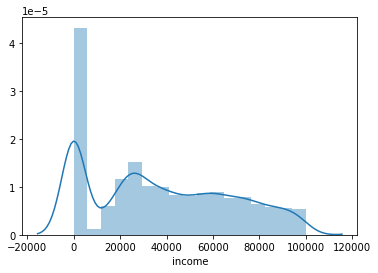

In [61]:
sns.distplot(x=data['income'])
plt.show()

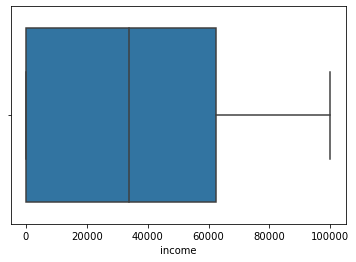

In [43]:
sns.boxplot(x=data['income'])
plt.show()

In [44]:
iqr = np.percentile(data['income'],75) - np.percentile(data['income'],25)
iqr

62320.0

In [45]:
upper_limit = np.percentile(data['income'],75) + 1.5*iqr # Standard but not a rule 
lower_limit = np.percentile(data['income'],25) - 1.5*iqr
upper_limit, lower_limit

(155800.0, -93480.0)

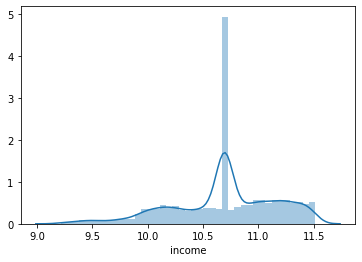

In [63]:
data1 = data.copy()

# we are replacing the -inf values after we take logarithm of 0
# we'll test 2 options (replacing -inf by zero or by the mean of the column after the log transformation)

log_lmbda = lambda x: np.log(x) if np.isfinite(np.log(x)) else np.NAN
data1['income'] = data1['income'].apply(log_lmbda)

data1['income'] = data1['income'].fillna(np.mean(data1['income']))
sns.distplot(data1['income'])
plt.show()

In [88]:
transformer = Normalizer() 
transformer.fit(numerical)
x_normalized = transformer.transform(numerical)
x_normalized.shape

(9134, 7)

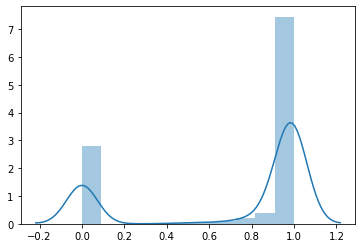

In [98]:
sns.distplot(x_normalized.T[1])

In [89]:
transformer = StandardScaler() 
transformer.fit(numerical)

x_standardized = transformer.transform(numerical)
x_standardized

array([[-0.76287773,  0.61282744, -0.70392465, ..., -1.54328695,
        -0.42224956, -0.82264788],
       [-0.14924546, -1.23961684,  0.02269103, ..., -0.21733419,
        -0.42224956,  2.10615996],
       [ 0.71063622,  0.36570978,  0.42959581, ..., -0.36068043,
        -0.42224956, -0.40424676],
       ...,
       [ 0.02313483, -1.23961684, -0.23889062, ..., -0.39651699,
         2.87324529, -0.40424676],
       [-0.06993547, -0.51735647,  0.08082028, ..., -1.61496007,
        -0.42224956,  0.01415436],
       [-0.78495478, -1.23961684, -0.47140763, ...,  1.50282075,
        -0.42224956, -0.82264788]])

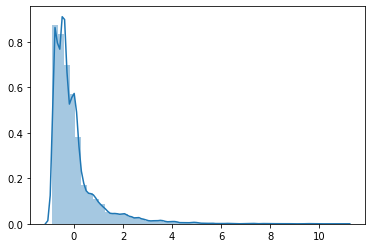

In [90]:
sns.distplot(x_standardized.T[0])